In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
df = pd.read_csv('AdSmartABdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [89]:
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [90]:
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [91]:
df.groupby('experiment')['auction_id'].count()

experiment
control    4071
exposed    4006
Name: auction_id, dtype: int64

In [178]:
df['experiment'][df['experiment'] == 'control'][df['yes'] == 1].count()

264

In [97]:
df[(df['yes'] == 1) & (df['no'] == 0)].count()

auction_id     572
experiment     572
date           572
hour           572
device_make    572
platform_os    572
browser        572
yes            572
no             572
dtype: int64

In [164]:
df.loc[df['experiment'] == 'control', 'auction_id']

3       00187412-2932-4542-a8ef-3633901c98d9
4       001a7785-d3fe-4e11-a344-c8735acacc2c
5       0027ce48-d3c6-4935-bb12-dfb5d5627857
6       002e308b-1a07-49d6-8560-0fbcdcd71e4b
7       00393fb9-ca32-40c0-bfcb-1bd83f319820
                        ...                 
8069    ffca1153-c182-4f32-9e90-2a6008417497
8070    ffcea781-a6e7-4f98-9d90-f95377270476
8073    ffea3210-2c3e-426f-a77d-0aa72e73b20f
8074    ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7
8076    fffbb9ff-568a-41a5-a0c3-6866592f80d8
Name: auction_id, Length: 4071, dtype: object

In [192]:
df.loc[df['experiment'] == 'exposed', 'auction_id']

0       0008ef63-77a7-448b-bd1e-075f42c55e39
1       000eabc5-17ce-4137-8efe-44734d914446
2       0016d14a-ae18-4a02-a204-6ba53b52f2ed
8       004940f5-c642-417a-8fd2-c8e5d989f358
13      006b9c6e-5f5d-4385-a811-ff20a24b30ac
                        ...                 
8065    ffbc02cb-628a-4de5-87fc-5d76b7d796e5
8067    ffc594ef-756c-4d24-a310-0d8eb4e11eb7
8071    ffdfdc09-48c7-4bfb-80f8-ec1eb633602b
8072    ffea24ec-cec1-43fb-b1d1-8f93828c2be2
8075    ffeeed62-3f7c-4a6e-8ba7-95d303d40969
Name: auction_id, Length: 4006, dtype: object

In [190]:
pd.crosstab(df['experiment'], df['yes'])

yes,0,1
experiment,,
control,3807,264
exposed,3698,308


In [191]:
pd.crosstab(df['experiment'], df['no'])

no,0,1
experiment,,
control,3749,322
exposed,3657,349


In [227]:
import scipy.stats as stats

conversion_rates = df.groupby('experiment')['yes']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.065,0.246,0.004
exposed,0.077,0.266,0.004


In [226]:
conversion_rates = df.groupby('experiment')['no']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.079,0.270,0.004
exposed,0.087,0.282,0.004


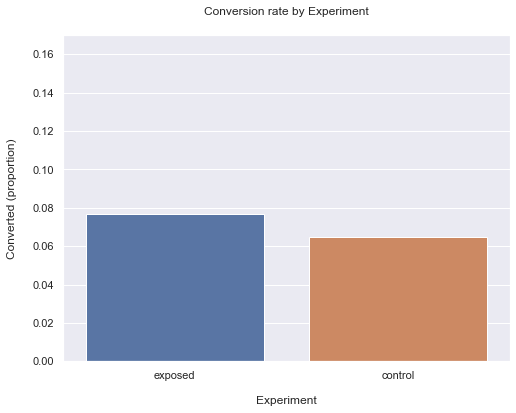

In [232]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['yes'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by Experiment', pad=20)
plt.xlabel('Experiment', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

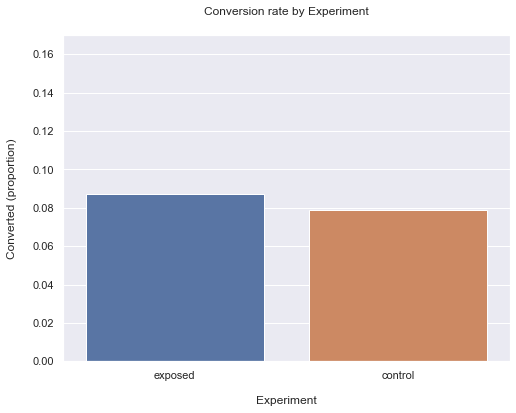

In [233]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['no'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by Experiment', pad=20)
plt.xlabel('Experiment', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

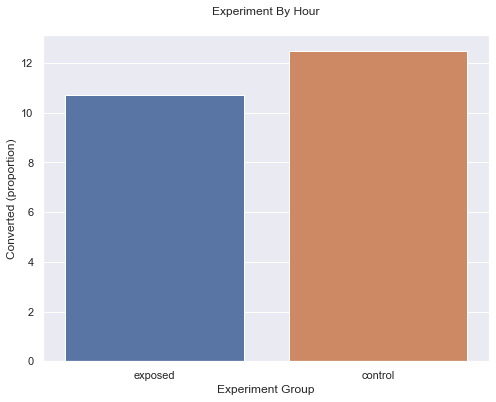

In [239]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['hour'], ci=False)

plt.title('Experiment By Hour', pad=20)
plt.xlabel('Experiment Group')
plt.ylabel('Converted (proportion)');

In [252]:
df['date'] = pd.to_datetime(df['date'])

df['day of week'] = df['date'].dt.day_name()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,day of week
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,Friday
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,Tuesday
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,Sunday
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,Friday
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,Sunday
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Friday
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,Saturday
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,Sunday


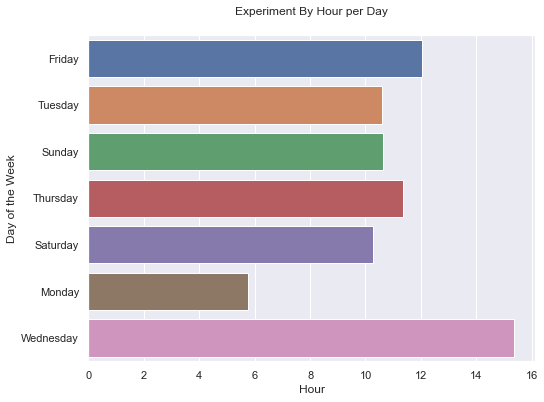

In [255]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['hour'], y=df['day of week'], ci=False)

plt.title('Experiment By Hour per Day', pad=20)
plt.xlabel('Hour')
plt.ylabel('Day of the Week');

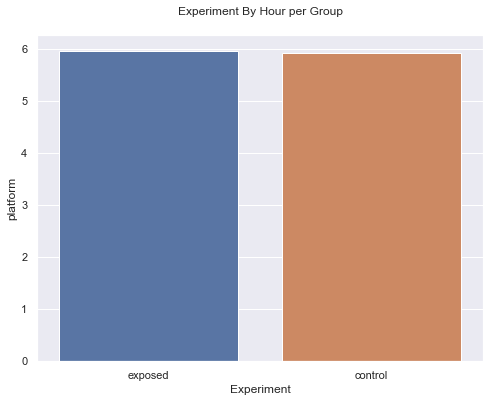

In [263]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['platform_os'], ci=False)

plt.title('Experiment By Hour per Group', pad=20)
plt.xlabel('Experiment')
plt.ylabel('platform');

In [265]:
len(df['device_make'].unique().tolist())

270

In [296]:
control_results = df[df['experiment'] == 'control'][['no']]
control_results_2 = df[df['experiment'] == 'control'][['yes']]

In [286]:
exposed_results = df[df['experiment'] == 'exposed'][['no']]

In [287]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [292]:
n_con = control_results.count()
n_treat = exposed_results.count()
successes = [control_results.sum(), exposed_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

array([-1.30626014])

In [382]:
df_yes = df[df['yes'] == 1]
df_yes = df_yes.drop('no', axis = 1)
df_yes = df_yes.rename(columns={"yes": "brand_awareness"})

In [383]:
df_yes

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,Saturday
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,Wednesday
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,Friday
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,Thursday
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,Sunday
...,...,...,...,...,...,...,...,...,...
8031,fe42a3c3-3e1e-40c9-b029-6b0ee9702aaa,control,2020-07-10,1,Generic Smartphone,6,Chrome Mobile,1,Friday
8042,fee7da61-84fe-451b-95f4-ba2523fa987d,exposed,2020-07-09,14,Generic Smartphone,6,Chrome Mobile,1,Thursday
8054,ff82e341-b72c-4531-b87e-1e11dc35d3fc,exposed,2020-07-10,8,Samsung SM-G973F,6,Samsung Internet,1,Friday
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,Sunday


In [384]:
df_no = df[df['no'] == 1]
df_no = df_no.drop('yes', axis = 1)

In [385]:
d = {1 : 0}
df_no = df_no.replace({'no':da})


In [386]:
df_no = df_no.rename(columns={"no": "brand_awareness"})

In [387]:
df_no

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,Sunday
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,Monday
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,Friday
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,Friday
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,Sunday
...,...,...,...,...,...,...,...,...,...
8016,fd86fc6b-3420-4f81-9df0-98fa1f15abf5,exposed,2020-07-08,17,Samsung SM-G965F,6,Facebook,0,Wednesday
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,Thursday
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,Thursday
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,Friday


In [389]:
df_clean = pd.concat([df_yes, df_no], axis = 0)

In [390]:
df_clean

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,Saturday
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,Wednesday
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,Friday
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,Thursday
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,Sunday
...,...,...,...,...,...,...,...,...,...
8016,fd86fc6b-3420-4f81-9df0-98fa1f15abf5,exposed,2020-07-08,17,Samsung SM-G965F,6,Facebook,0,Wednesday
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,Thursday
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,Thursday
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,Friday


In [391]:
df_clean = df_clean.sample(frac=1).reset_index(drop=True)

In [392]:
df_clean

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
0,ff82e341-b72c-4531-b87e-1e11dc35d3fc,exposed,2020-07-10,8,Samsung SM-G973F,6,Samsung Internet,1,Friday
1,5f8b891c-ae33-41a3-bd9f-7a8b5238b7ae,exposed,2020-07-07,3,Samsung SM-G973F,6,Samsung Internet,0,Tuesday
2,a0b79f33-d611-45bb-8683-158b404f6e5a,exposed,2020-07-07,6,Samsung SM-A505FN,6,Chrome Mobile WebView,0,Tuesday
3,fc100e4d-08a8-44a2-856c-6e2e49664a11,control,2020-07-03,15,Samsung SM-J330FN,6,Samsung Internet,1,Friday
4,67d06c4c-9642-431f-902d-115baf15ef81,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,Friday
...,...,...,...,...,...,...,...,...,...
1238,f27fb7fa-fe23-43d4-bcd0-8baa18774dd3,control,2020-07-03,15,Pixel 2,6,Facebook,1,Friday
1239,87fbdaef-9c71-4fa6-a675-e90b6c6833d0,exposed,2020-07-08,3,Generic Smartphone,6,Chrome Mobile,0,Wednesday
1240,dcdbd941-3a00-43a3-9bfb-de2774ee2f41,exposed,2020-07-07,7,Generic Smartphone,6,Chrome Mobile,1,Tuesday
1241,0ad6d944-b1d2-472b-96f4-b99f451b28c1,exposed,2020-07-08,22,Generic Smartphone,6,Chrome Mobile,0,Wednesday


In [397]:
control_results = df_clean[df_clean['experiment'] == 'control']['brand_awareness']
exposed_results = df_clean[df_clean['experiment'] == 'exposed']['brand_awareness']

In [402]:
n_con = control_results.count()
n_expo = exposed_results.count()
successes = [control_results.sum(), exposed_results.sum()]
nobs = [n_con, n_expo]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for exposed group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.65
p-value: 0.518
ci 95% for control group: [0.410, 0.491]
ci 95% for exposed group: [0.431, 0.507]


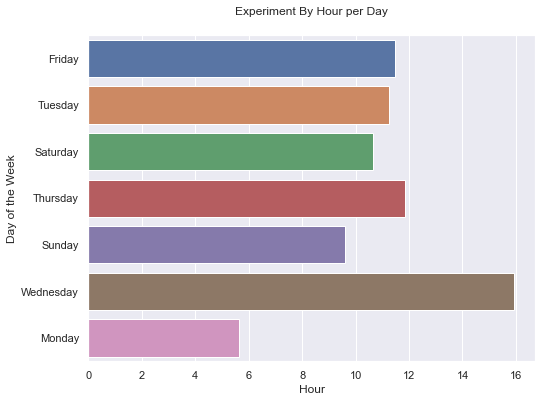

In [403]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_clean['hour'], y=df_clean['day of week'], ci=False)

plt.title('Experiment By Hour per Day', pad=20)
plt.xlabel('Hour')
plt.ylabel('Day of the Week');

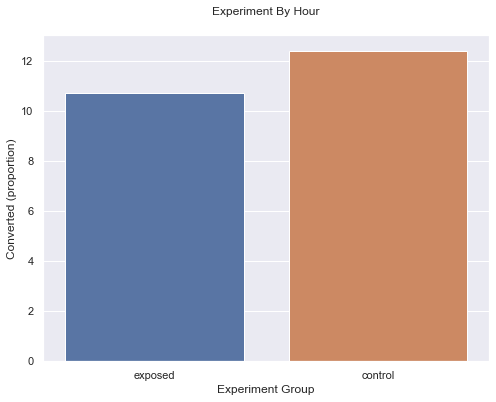

In [404]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_clean['experiment'], y=df_clean['hour'], ci=False)

plt.title('Experiment By Hour', pad=20)
plt.xlabel('Experiment Group')
plt.ylabel('Converted (proportion)');

In [407]:
#Show the % split between users who saw new vs old page
#Calculate pooled probability
mask = (df_clean["experiment"] == "control")
awareness_control = df_clean["brand_awareness"][mask].sum()
total_users_control = df_clean["brand_awareness"][mask].count()

mask = (df["experiment"] == "exposed")
awareness_exposed = df_clean["brand_awareness"][mask].sum()
total_users_exposed = df_clean["brand_awareness"][mask].count()

print("Split of control users who know the brand vs exposed users who know the brand: ", 
          round(total_users_control / df_clean["brand_awareness"].count() * 100, 2), "% ",
          round((total_users_exposed / df_clean["brand_awareness"].count()) * 100, 2), "%")

#count number of users who converted in each group
print("Number of control users who know the brand: ", conversions_control)
print("Percentage of control users who know the brand: ", round((conversions_control / total_users_control) * 100, 2), "%")

mask = (df_clean["experiment"] == "control")
print("Number of exposed users who know the brand with the creative ad: ", conversions_treatment)
print("Percentage of exposed users who know the brand with the creative ad: ", round((conversions_treatment/ total_users_treatment) * 100, 2), "%")

Split of control users who know the brand vs exposed users who know the brand:  47.14 %  49.16 %
Number of control users who know the brand:  264
Percentage of control users who know the brand:  45.05 %
Number of exposed users who know the brand with the creative ad:  280
Percentage of exposed users who know the brand with the creative ad:  45.83 %


Sequential Testing